In [1]:
#import all the libraries which are required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the companies csv data
companies=pd.read_csv('../Investment Assignment/companies.csv',encoding='ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#load the rounds2.csv data
rounds2=pd.read_csv('../Investment Assignment/rounds2.csv',encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#referred this url for encoding:-https://docs.python.org/3/library/codecs.html#standard-encodings 
#referred this url for encoding:https://github.com/domoinc/domo-python-sdk/issues/11
#encode/decode for rounds2.csv file
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
#encode/decode for companies.csv file
companies.permalink=companies.permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')

In [5]:
#How many unique companies are present in rounds2?
len(rounds2.company_permalink.str.lower().unique())

66368

In [6]:
#How many unique companies are present in companies?
len(companies.permalink.str.lower().unique())

66368

In [7]:
#In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
#ANSWER : "permalink" column can be used as the unique key for each company because it contains all the company names

#### ANSWER : "permalink" column can be used as the unique key for each company because it contains all the company names

In [8]:
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
rounds2.company_permalink= rounds2.company_permalink.str.lower()
companies.permalink= companies.permalink.str.lower()
rounds2.company_permalink
companies.permalink

#Answer is YES : because as we can see from the print statement output some companies which are not present in the rounds2 are present in companies

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                   /organization/eron
66366                                 /organization/asys-2
66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: permalink, Length: 66368, dtype: object

#### Answer is YES : because as we can see both the columns result, some companies which are not present in the rounds2 are present in companies

In [9]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
master_frame = pd.merge(rounds2, companies, how='inner', left_on=['company_permalink'], right_on=['permalink'])
#How many observations are present in master_frame?
len(master_frame.index)

114949

In [10]:
#check top rows of dataframe
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


## Data Cleaning 1

In [11]:
#find the total number of null values in the dataframe
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [12]:
#now check the % of null values for each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [13]:
#we will drop the columns which are not necessary for our analysis
master_frame = master_frame.drop(columns=['funding_round_permalink','funding_round_code', 'funded_at','permalink', 'homepage_url','status','state_code', 'region', 'city', 'founded_at'], axis=1)

In [14]:
# column "raised_amount_usd" required for our analysis and now we check here the total number of null values in raised_amount_usd column
master_frame.raised_amount_usd.isnull().sum()

19990

In [15]:
#from above % of null values we got 17.39% null values are there in "raised_amount_usd" column and rather than imputing we will remove the values
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [16]:
#crossverify if there are any null values in the column
master_frame.raised_amount_usd.isnull().sum()

0

In [17]:
#country_code and category_list are needed for the analysis,so we will remove the null values from this columns
master_frame=master_frame[~master_frame['category_list'].isnull()]
#crossverify if there are any null values in the column "category_list"
master_frame['category_list'].isnull().sum()

0

In [18]:
#remove null values from 'country_code' column
master_frame=master_frame[~master_frame['country_code'].isnull()]
#crossverify if there are any null values in the column "category_list"
master_frame['country_code'].isnull().sum()

0

In [19]:
#check shape of the dataframe(i.e total no.of rows and columns)
master_frame.shape

(88529, 6)

### Checkpoint 2: Funding Type Analysis

In [20]:
#we will drop all the rows which are not of type 'venture', 'angel', 'seed', and 'private equity' based on checkpoint 2
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'angel','seed', 'private_equity'])]

In [21]:
#check count of unique values for 'venture', 'angel', 'seed', and 'private equity'
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [22]:
#Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 
#Representative funding amount of venture type
#check mean
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False),2)

funding_round_type
private_equity    73938486.28
venture           11724222.69
angel               971573.89
seed                747793.68
Name: raised_amount_usd, dtype: float64

In [23]:
#check median
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False),2)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

#### The best investment for Spark Funds is Venture.Because,the avg investment is 11.72 million which is in the Sparks Fund Investement  range(5 to 15 million USD )

# Checkpoint 3: Country Analysis

In [24]:
#check random rows from dataframe
master_frame.sample(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
44265,/organization/hiperscan,seed,656000.0,HiperScan,Health Care,DEU
90965,/organization/smart-lunches,venture,1600000.0,Smart Lunches,E-Commerce,USA
82895,/organization/rent-my-vacation-home-com,private_equity,2500000.0,Rent My Vacation Home USA,E-Commerce|Online Rental|Real Estate|Vacation ...,USA
66464,/organization/neocase-software,venture,6500000.0,Neocase Software,Software,USA
38368,/organization/gaga-sports-entertainment,angel,500000.0,GAGA Sports & Entertainment,Internet|Social CRM|Social Network Media|Sports,USA
60833,/organization/memory-pharmaceuticals,venture,31000000.0,Memory Pharmaceuticals,Biotechnology|Medical Devices|Neuroscience,USA
12349,/organization/biomimetic-therapeutics,venture,25700000.0,BioMimetic Therapeutics,Biotechnology,USA
105653,/organization/valunet,venture,1014999.0,ValuNet,Mobile,USA
28427,/organization/doctor-on-demand,seed,3000000.0,Doctor on Demand,Health Care,USA
6700,/organization/applied-optoelectronics-inc,venture,28000000.0,Applied Optoelectronics,Semiconductors,USA


In [25]:
# top nine countries based on total investment 
top9=pd.DataFrame(master_frame.groupby('country_code')['raised_amount_usd'].sum())
top9.sort_values(by='raised_amount_usd',ascending=False).head(9)

,raised_amount_usd
country_code,
USA,5.084739e+11
CHN,6.100092e+10
GBR,2.689981e+10
IND,2.104911e+10
CAN,1.316891e+10
DEU,8.580103e+09
ISR,8.101823e+09
FRA,8.078614e+09
NLD,5.058484e+09


#### Based on the above results, the top three English-speaking countries in the data frame top9 are USA,GBR,IND.

## Checkpoint 4: Sector Analysis 1  

In [26]:
#load the mapping csv file
mapping=pd.read_csv('../Investment Assignment/mapping.csv',encoding='ISO-8859-1')
#check the top rows
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [27]:
#Extract the primary sector of each category list from the category_list column
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN,Curated Web
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology
...,...,...,...,...,...,...,...
114941,/organization/zznode-science-and-technology-co...,venture,1587301.0,ZZNode Science and Technology,Enterprise Software,CHN,Enterprise Software
114942,/organization/zzzzapp-com,seed,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,Advertising
114943,/organization/zzzzapp-com,seed,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,Advertising
114945,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,Advertising


In [28]:
#check the summary of mapping dataframe(i.e it's data type,non-null values etc.)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [29]:
#Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)
mapping=pd.melt(mapping,id_vars=['category_list'],value_vars=['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])
mapping

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
5499,Wholesale,"Social, Finance, Analytics, Advertising",0
5500,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5501,Wireless,"Social, Finance, Analytics, Advertising",0
5502,Women,"Social, Finance, Analytics, Advertising",0


In [30]:
#drop the value column from mapping dataframe
mapping = mapping[~(mapping.value == 0)]
mapping=mapping.drop(columns='value',axis=1)

In [31]:
mapping

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [32]:
#check the summary of mapping dataframe(i.e it's data type,non-null values etc.)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 5479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   variable       687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [33]:
#rename column name varibale to main_sector
#referred this url for renaming columns:https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
mapping.columns = mapping.columns.str.replace('variable', 'main_sector')
#check top rows and check if main_sector variable is create or not
mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [34]:
#Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.sample(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
61777,/organization/squaretrade,venture,9000000.0,SquareTrade,Hardware + Software|Insurance,USA,Hardware + Software,NaN
55258,/organization/robotgalaxy,venture,7000000.0,Robotgalaxy,Games,USA,Games,Entertainment
17999,/organization/devicefidelity,venture,2175024.0,DeviceFidelity,Mobile,USA,Mobile,"News, Search and Messaging"
71216,/organization/wakie-budist,seed,2000000.0,Wakie,Crowdsourcing|Mobile|Social Media,USA,Crowdsourcing,NaN
12781,/organization/choremonster,venture,1500000.0,ChoreMonster,Apps|Curated Web|Internet|Kids|Mobile|Parenting,USA,Apps,NaN
66160,/organization/tokbox,venture,10000000.0,TokBox,Archiving|Messaging|Video Conferencing,USA,Archiving,NaN
25925,/organization/geovantage,seed,1111351.0,GeoVantage,Public Transportation,USA,Public Transportation,Health
51581,/organization/pronewtech-s-a,angel,66230.0,ProNewTech S.A.,Consulting,BEL,Consulting,"Social, Finance, Analytics, Advertising"
58966,/organization/singspiel,seed,30095.0,Singspiel,Education|Internet|Mobile|Music,CAN,Education,NaN
29765,/organization/hzo,venture,3625000.0,HZO,Consumer Electronics|Customer Service|Hardware...,USA,Consumer Electronics,NaN


In [35]:
#check total null values in the main sector
master_frame.main_sector.isnull().sum()

42181

In [36]:
#drop the rows having null values from main sector
master_frame = master_frame[~(master_frame.main_sector.isnull())]
#cross verify if there are any null values in the main_sector column
master_frame.main_sector.isnull().sum()

0

## Checkpoint 5: Sector Analysis 2

In [37]:
#D1 dataframe -Country : USA
D1=master_frame[(master_frame.country_code == 'USA') & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]
D1.sample(7)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
46847,/organization/oraxion,venture,8000000.0,Oraxion,Semiconductors,USA,Semiconductors,Cleantech / Semiconductors
63023,/organization/surgiquest,venture,9999992.0,SurgiQuest,Health Care,USA,Health Care,Health
46463,/organization/open-road-integrated-media,venture,8000000.0,Open Road Integrated Media,Advertising,USA,Advertising,"Social, Finance, Analytics, Advertising"
69670,/organization/vestaron-corporation,venture,10000000.0,Vestaron Corporation,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
26632,/organization/gmi-ratings,venture,5000000.0,GMI Ratings,Enterprise Software,USA,Enterprise Software,Others
36053,/organization/lefthand-networks,venture,13000000.0,Lefthand Networks,Software,USA,Software,Others
47231,/organization/outerbay-technologies,venture,9000000.0,OuterBay Technologies,Software,USA,Software,Others


In [38]:
#D1['raised_amount_usd'].groupby('main_sector').agg(['sum', 'count'])
D1_merge_pt=D1.pivot_table(values='raised_amount_usd', index='main_sector', aggfunc=('sum','count'))
D1=D1.merge(D1_merge_pt, how='left', on='main_sector')
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count,sum
0,/organization/1366-technologies,venture,15000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,424,3.875981e+09
1,/organization/1366-technologies,venture,5000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,424,3.875981e+09
2,/organization/1366-technologies,venture,5150000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,424,3.875981e+09
3,/organization/1366-technologies,venture,12400000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,424,3.875981e+09
4,/organization/1366-technologies,venture,6000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,424,3.875981e+09


In [39]:
#check random row and columns from D1 dataframe
D1.sample(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count,sum
3417,/organization/mobixell,venture,10000000.0,Mobixell Networks,Mobile,USA,Mobile,"News, Search and Messaging",574,4.949025e+09
2526,/organization/i-omagic,venture,8000000.0,I/OMagic,Electronics,USA,Electronics,Manufacturing,424,3.875981e+09
6048,/organization/xceedium,venture,12000000.0,Xceedium,Security,USA,Security,Others,2134,1.906870e+10
161,/organization/adtoapp,venture,6000000.0,AdtoApp,Marketing Automation,USA,Marketing Automation,"Social, Finance, Analytics, Advertising",360,3.041602e+09
2598,/organization/imprivata,venture,8910000.0,Imprivata,Security,USA,Security,Others,2134,1.906870e+10
1849,/organization/ecosense-lighting,venture,9822684.0,EcoSense Lighting,Clean Technology,USA,Clean Technology,Cleantech / Semiconductors,1815,1.666952e+10
1930,/organization/endogastric-solutions,venture,13000000.0,EndoGastric Solutions,Health Care,USA,Health Care,Health,637,5.720776e+09
4859,/organization/shoptap,venture,5824998.0,ShopTap,Mobile,USA,Mobile,"News, Search and Messaging",574,4.949025e+09
3478,/organization/mulesoft,venture,12500000.0,MuleSoft,Enterprise Software,USA,Enterprise Software,Others,2134,1.906870e+10
225,/organization/agility-healthcare-solution,venture,5250000.0,Agility Healthcare Solution,Health and Wellness,USA,Health and Wellness,Health,637,5.720776e+09


In [40]:
#Total number of investments for C1 country (USA)
print(D1.raised_amount_usd.count())

6188


In [41]:
# Total amount of investment for C1 country
print(D1.raised_amount_usd.sum())

55387138930.0


In [42]:
#D2 dataframe -Country : GBR
D2=master_frame[(master_frame.country_code == 'GBR') & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]
D2.sample(7)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
1146,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,E-Commerce,Others
42957,/organization/nallatech,venture,5000000.0,Nallatech,Hardware + Software,GBR,Hardware + Software,Manufacturing
4150,/organization/apitope,venture,13456610.0,Apitope,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
34135,/organization/kalvista-pharmaceuticals,venture,13207305.0,KalVista Pharmaceuticals,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
38092,/organization/m-squared-lasers,venture,6257937.0,M Squared Lasers,Manufacturing,GBR,Manufacturing,Manufacturing
34407,/organization/kelway,venture,9690000.0,Kelway,Enterprise Software,GBR,Enterprise Software,Others
48077,/organization/passado,venture,13200000.0,Passado,Curated Web,GBR,Curated Web,"News, Search and Messaging"


In [43]:
D2_merge_pt=D2.pivot_table(values='raised_amount_usd', index='main_sector', aggfunc=('sum','count'))
D2=D2.merge(D2_merge_pt, how='left', on='main_sector')
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count,sum
0,/organization/abcodia,venture,8259067.0,Abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,109,961317185.0
1,/organization/acacia-pharma,venture,10000000.0,Acacia Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,109,961317185.0
2,/organization/acal-energy,venture,9910333.0,ACAL Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors,109,961317185.0
3,/organization/acal-enterprise-solutions,venture,10720178.0,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising",24,215156392.0
4,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,E-Commerce,Others,109,961464687.0


In [44]:
#Total number of investments for C2 country (GBR)
print(D2.raised_amount_usd.count())

353


In [45]:
# Total amount of investment for C2 country
print(D2.raised_amount_usd.sum())

3116709825.0


In [46]:
#D3 dataframe -Country : IND
D3=master_frame[(master_frame.country_code == 'IND') & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]
D3.sample(7)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
30534,/organization/imimobile,venture,13000000.0,IMImobile,Mobile,IND,Mobile,"News, Search and Messaging"
48783,/organization/perfint-healthcare,venture,14000000.0,Perfint Healthcare,Biotechnology,IND,Biotechnology,Cleantech / Semiconductors
57306,/organization/senco-gold,private_equity,13000000.0,Senco Gold,Jewelry,IND,Jewelry,Entertainment
60574,/organization/somany-ceramics,venture,8000000.0,Somany Ceramics,Manufacturing,IND,Manufacturing,Manufacturing
24547,/organization/forus-health,venture,8400000.0,Forus Health,Health Care,IND,Health Care,Health
42712,/organization/myntra,venture,5000000.0,Myntra,E-Commerce,IND,E-Commerce,Others
74873,/organization/zoomo,venture,5000000.0,Zoomo,Internet,IND,Internet,"News, Search and Messaging"


In [47]:
D3_merge_pt=D3.pivot_table(values='raised_amount_usd', index='main_sector', aggfunc=('sum','count'))
D3=D3.merge(D3_merge_pt, how='left', on='main_sector')
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,count,sum
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment,20,169150000.0
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,E-Commerce,Others,75,685169507.0
2,/organization/amagi-media-labs,venture,5500000.0,Amagi Media Labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising",10,78540000.0
3,/organization/ameyo,venture,5000000.0,Ameyo,Software,IND,Software,Others,75,685169507.0
4,/organization/applabs,venture,10000000.0,AppLabs,Software,IND,Software,Others,75,685169507.0


In [48]:
#Total number of investments for C3 Country(IND)
print(D3.raised_amount_usd.count())

178


In [49]:
# Total amount of investment for C3 Country
print(D3.raised_amount_usd.sum())

1562398277.0


In [50]:
#Top sector (based on count of investments) for C1 country
D1_merge_pt

,count,sum
main_sector,,
Automotive & Sports,41,3.172203e+08
Cleantech / Semiconductors,1815,1.666952e+10
Entertainment,203,1.744320e+09
Health,637,5.720776e+09
Manufacturing,424,3.875981e+09
"News, Search and Messaging",574,4.949025e+09
Others,2134,1.906870e+10
"Social, Finance, Analytics, Advertising",360,3.041602e+09


In [51]:
#Top sector (based on count of investments) for C2 Country
D2_merge_pt

,count,sum
main_sector,,
Automotive & Sports,4,35413182.0
Cleantech / Semiconductors,109,961317185.0
Entertainment,29,264098740.0
Health,14,117740187.0
Manufacturing,30,269049312.0
"News, Search and Messaging",34,292470140.0
Others,109,961464687.0
"Social, Finance, Analytics, Advertising",24,215156392.0


In [52]:
#Top sector (based on count of investments) for C3 Country
D3_merge_pt

,count,sum
main_sector,,
Automotive & Sports,2,21400000.0
Cleantech / Semiconductors,15,113780000.0
Entertainment,20,169150000.0
Health,14,120540000.0
Manufacturing,11,106700000.0
"News, Search and Messaging",31,267118770.0
Others,75,685169507.0
"Social, Finance, Analytics, Advertising",10,78540000.0


In [53]:
# For the top sector count-wise (point 3), which company received the highest investment? for C1 Country
company_inv=D1[D1.main_sector =='Others'].groupby('company_permalink').agg(np.sum)
company_inv.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/virtustream,64300000.0,12804,1.144122e+11
/organization/capella,54968051.0,12804,1.144122e+11
/organization/deliveryagent,51538337.0,12804,1.144122e+11


In [54]:
# For the top sector count-wise (point 3), which company received the highest investment? for C2 Country
company_inv1=D2[D2.main_sector =='Others'].groupby('company_permalink').agg(np.sum)
company_inv1.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/electric-cloud,37000000.0,436,3.845859e+09
/organization/sensage,36250000.0,436,3.845859e+09
/organization/enigmatic,32500000.0,327,2.884394e+09


In [55]:
# For the top sector count-wise (point 3), which company received the highest investment? for C3 Country
company_inv2=D3[D3.main_sector =='Others'].groupby('company_permalink').agg(np.sum)
company_inv2.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/firstcry-com,39000000.0,225,2.055509e+09
/organization/myntra,38000000.0,300,2.740678e+09
/organization/commonfloor,32900000.0,225,2.055509e+09


In [56]:
#For the second-best sector count-wise (point 4), which company received the highest investment? for C1 country
company_inv=D1[D1.main_sector =='Cleantech / Semiconductors'].groupby('company_permalink').agg(np.sum)
company_inv.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/tigo-energy,68739496.0,14520,1.333561e+11
/organization/irhythm,62680000.0,10890,1.000171e+11
/organization/forsight-labs,61300001.0,12705,1.166866e+11


In [57]:
#For the second-best sector count-wise (point 4), which company received the highest investment? for C2 country
company_inv=D2[D2.main_sector =='Cleantech / Semiconductors'].groupby('company_permalink').agg(np.sum)
company_inv.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/eusa-pharma,35600000.0,327,2.883952e+09
/organization/elixent,25000000.0,218,1.922634e+09
/organization/camsemi,22177939.0,327,2.883952e+09


In [58]:
#For the second-best sector count-wise (point 4), which company received the highest investment? for C2 country
company_inv=D3[D3.main_sector =='News, Search and Messaging'].groupby('company_permalink').agg(np.sum)
company_inv.sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,count,sum
company_permalink,,,
/organization/gupshup-technology-india-pvt-ltd,33000000.0,93,801356310.0
/organization/imimobile,23000000.0,62,534237540.0
/organization/sms-gupshup,22000000.0,62,534237540.0


## Checkpoint 6: Plots 

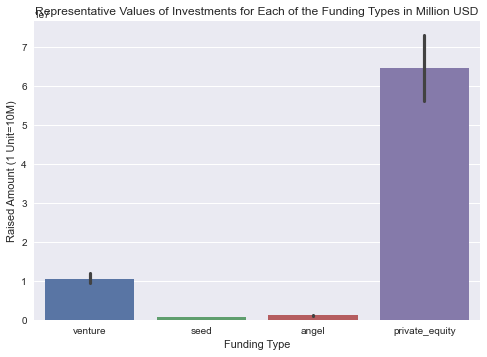

In [59]:
#1.A plot showing the representative amount of investment in each funding type.
plt.style.use('seaborn')
sns.barplot(data=master_frame, x='funding_round_type',y='raised_amount_usd',estimator=np.mean)
plt.title('Representative Values of Investments for Each of the Funding Types in Million USD')
plt.xlabel('Funding Type')
plt.ylabel('Raised Amount (1 Unit=10M)')
#plt.semilogy()
plt.show()

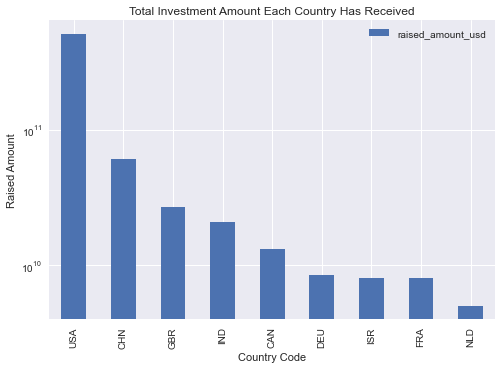

In [60]:
#2.A plot showing the top 9 countries against the total amount of investments of funding type FT
plt.style.use('seaborn')
top9.sort_values(by='raised_amount_usd',ascending=False).head(9).plot(kind='bar',logy=True)
plt.title('Total Investment Amount Each Country Has Received')
plt.xlabel('Country Code')
plt.ylabel('Raised Amount')
plt.show()

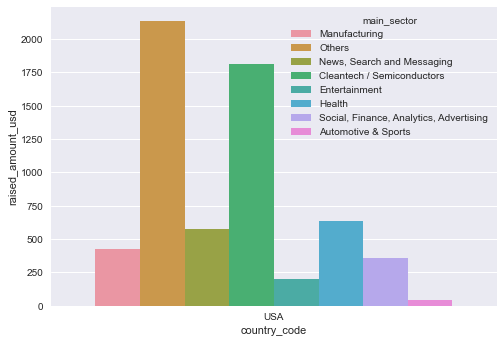

In [61]:
#3.A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)
#barplot for country USA
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector",data=D1,estimator=np.count_nonzero)
plt.show()

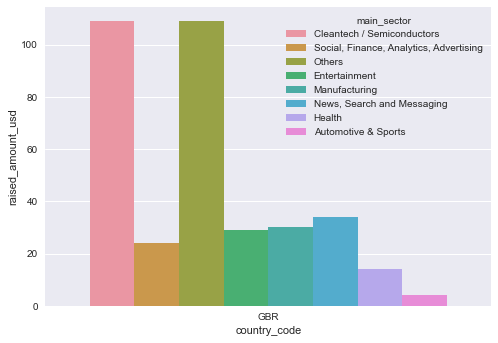

In [62]:
#barplot for country GBR
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector",data=D2,estimator=np.count_nonzero)
plt.show()

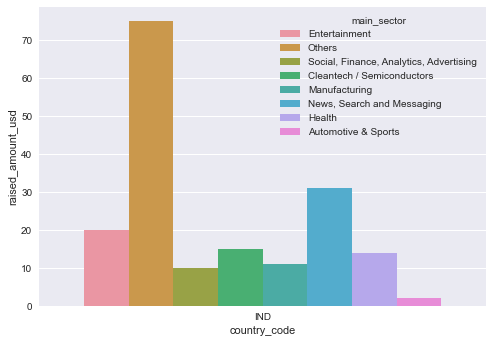

In [63]:
#barplot for country IND
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector",data=D3,estimator=np.count_nonzero)
plt.show()